In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/torchtorch/'

Mounted at /content/drive


In [ ]:
pip install fastai --upgrade

In [3]:
import os
os.chdir(path)

In [4]:
pip install -Uqq fastbook

     |████████████████████████████████| 719 kB 5.1 MB/s 
     |████████████████████████████████| 1.2 MB 51.7 MB/s 


In [6]:
#hide
import fastbook
fastbook.setup_book()

#hide
from fastbook import *

Mounted at /content/gdrive


# 이미지 분류

In [ ]:
from fastai.vision.all import *
# Path라는 특이한 객체로 반환
path = untar_data(URLs.PETS)/'images'

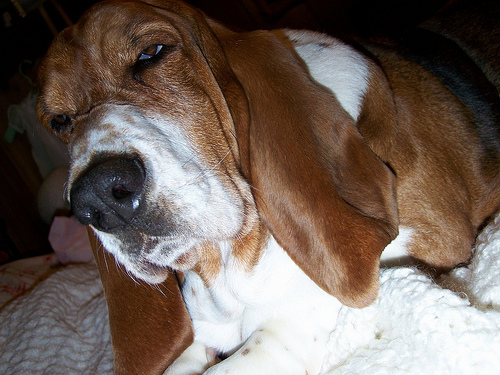

In [17]:
from PIL import Image
Image.open(get_image_files(path)[0])

In [ ]:
def is_cat(x):
    return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.164282,0.017196,0.006766,01:37


epoch,train_loss,valid_loss,error_rate,time
0,0.060487,0.014376,0.004060,02:15


In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(uploader.data[0])

In [ ]:
is_cat,_,probs = learn.predict(img)
print(is_cat, probs[0])

False TensorBase(0.9994)


# 세그멘테이션

In [7]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs = 8, fnames = get_image_files(path/'images'),
    label_func = lambda o:path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt',dtype=str)
)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1142: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


In [13]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1142: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,time
0,2.733208,2.302760,00:02


epoch,train_loss,valid_loss,time
0,1.854461,1.462804,00:02
1,1.623793,1.308363,00:02
2,1.459857,1.081751,00:02
3,1.320186,0.939340,00:02
4,1.194108,0.725294,00:02
5,1.082116,0.659012,00:02
6,0.985313,0.632570,00:02
7,0.911962,0.629090,00:02


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1142: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


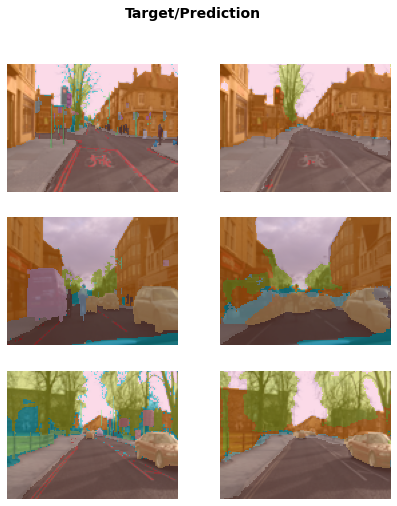

In [16]:
learn.show_results(max_n=3, figsize=(7,8))

# 자연어

In [5]:
from fastai.text.all import  *

In [6]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.468458,0.419639,0.808280,03:10


epoch,train_loss,valid_loss,accuracy,time
0,0.311474,0.274359,0.894120,07:16
1,0.247779,0.209911,0.918480,07:16
2,0.199238,0.196949,0.923080,07:23
3,0.149100,0.202085,0.927200,07:15


# 테이블

In [20]:
from fastai.tabular.all import  *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv',path=path,y_names='salary',
                                  cat_names = ['workclass','education','marital-status',
                                               'occupation','relationship','race'],   # 범주형
                                  cont_names = ['age','fnlwgt','education-num'],  # 이산형
                                  procs=[Categorify,FillMissing,Normalize])
learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.364597,0.367324,0.835842,00:04
1,0.369979,0.354548,0.838298,00:04
2,0.348058,0.350810,0.839681,00:04


In [18]:
import pandas as pd
pd.read_csv(path/'adult.csv').head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [21]:
learn.show_results()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary,salary_pred
0,5.0,16.0,3.0,7.0,1.0,5.0,1.0,-0.340267,-0.294658,-0.030091,0.0,0.0
1,5.0,16.0,4.0,2.0,4.0,2.0,1.0,-1.216415,0.362651,-0.030091,0.0,0.0
2,8.0,8.0,3.0,12.0,1.0,5.0,1.0,0.608893,2.654576,0.751787,0.0,1.0
3,2.0,12.0,3.0,15.0,1.0,5.0,1.0,0.900942,-1.366452,-0.421030,0.0,0.0
4,3.0,6.0,7.0,9.0,2.0,5.0,1.0,2.069139,-0.121129,-2.375724,0.0,0.0
5,7.0,12.0,1.0,6.0,2.0,5.0,1.0,-0.778341,0.012419,-0.421030,0.0,0.0
6,1.0,12.0,6.0,1.0,5.0,5.0,1.0,-0.413280,-0.112668,-0.421030,0.0,0.0
7,5.0,12.0,1.0,2.0,2.0,5.0,1.0,-0.997378,1.726865,-0.421030,0.0,0.0
8,5.0,1.0,7.0,13.0,2.0,5.0,1.0,1.558053,-0.649825,-1.593846,0.0,0.0


# 추천

In [22]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.506384,1.430907,00:00


epoch,train_loss,valid_loss,time
0,1.364745,1.373444,00:00
1,1.276639,1.196261,00:00
2,1.051079,0.884221,00:00
3,0.818540,0.724513,00:00
4,0.702457,0.683077,00:00
5,0.653562,0.668785,00:00
6,0.618845,0.663649,00:00
7,0.611665,0.660879,00:00
8,0.601408,0.659882,00:00
9,0.597505,0.659689,00:00


In [24]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,41.0,79.0,4.0,3.969129
1,67.0,10.0,1.0,2.626048
2,8.0,12.0,3.5,2.793944
3,57.0,93.0,3.0,3.728282
4,66.0,63.0,4.0,4.478488
5,73.0,47.0,5.0,4.455514
6,2.0,94.0,1.5,3.463235
7,80.0,76.0,3.0,3.580832
8,92.0,66.0,4.0,4.217396
